# 📊**Book Recommendation System**

## 📝 **Metadata**

**Notebook Title:** Book Recommendation System  
**Author:** Vishnu Vineeth P M

**Date Created:** May 2025   
**Tools Used:** Python, Pandas, numpy

**Objective:** The objective is to develop a program that can recommend similar book to the user

## 📈 Introduction
This project focuses on building a Book Recommendation System that suggests similar books based on a user's interest. Using collaborative filtering techniques and similarity metrics (like cosine similarity), the system analyzes user preferences and book metadata to generate personalized recommendations.

The goal is to help users discover new books they are likely to enjoy, based on patterns in user behavior and book features. This project uses a combination of data preprocessing, pivot tables, similarity scoring, and an intuitive recommendation function to provide accurate and meaningful suggestions.

## 📚Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings("ignore")

## 📥Understand the Data

In [2]:
!gdown 1QImjNOSi3HCEBibj51rGP7iFgIn_UWPm
!gdown 1VrpGGFoTIg_a40LNOKe0hx-Gs8Ls4HmO
!gdown 1XU4wqItmTZEObuSXWB7aP2pGOafuWIwQ

Downloading...
From: https://drive.google.com/uc?id=1QImjNOSi3HCEBibj51rGP7iFgIn_UWPm
To: /content/Books.csv
100% 73.3M/73.3M [00:01<00:00, 58.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1VrpGGFoTIg_a40LNOKe0hx-Gs8Ls4HmO
To: /content/Users.csv
100% 11.0M/11.0M [00:00<00:00, 54.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XU4wqItmTZEObuSXWB7aP2pGOafuWIwQ
To: /content/Ratings.csv
100% 22.6M/22.6M [00:00<00:00, 42.0MB/s]


In [3]:
books = pd.read_csv("Books.csv")
users = pd.read_csv("Users.csv")
ratings = pd.read_csv("Ratings.csv")

In [4]:
#let us see the datas
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


The rating are given out of 10

## 📈 Exploratory Data Analysis

In [7]:
print("Shape of the books data is: ",books.shape)
print("-" * 30)
books.info()

Shape of the books data is:  (271360, 8)
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [8]:
print("Shape of the users data is: ",users.shape)
print("-" * 30)
users.info()

Shape of the users data is:  (278858, 3)
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


There are some missing values present in the Age column

In [9]:
print("Shape of the ratings data is: ",ratings.shape)
print("-" * 30)
ratings.info()

Shape of the ratings data is:  (1149780, 3)
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [10]:
#let us look at the ratings data
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


We can see that some values are being rated as 0. What does this mean?
- This can be interpreted as the books which are unrated

In [11]:
ratings["Book-Rating"].value_counts()

,count
Book-Rating,
0,716109
8,103736
10,78610
7,76457
9,67541
5,50974
6,36924
4,8904
3,5996


There are more than 7 lakhs books which has been rated as 0.
- We cannot simply remove this . But instead we can only include that data which are not being rated as 0

In [12]:
books["Publisher"].value_counts()

,count
Publisher,
Harlequin,7535
Silhouette,4220
Pocket,3905
Ballantine Books,3783
Bantam Books,3646
...,...
Scholastic (An Apple Paperback),1
Spencer Butte Press,1
Kowalski,1


The top three publishers worldwide are :
- Harlequin
- Silhouette
- Pocket

In [13]:
#top 3 authors
books["Book-Author"].value_counts()[:3]

,count
Book-Author,
Agatha Christie,632
William Shakespeare,567
Stephen King,524


In [14]:
df_clean = ratings[ratings["Book-Rating"] != 0]
df_clean.head()

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6


## Univariate Analysis

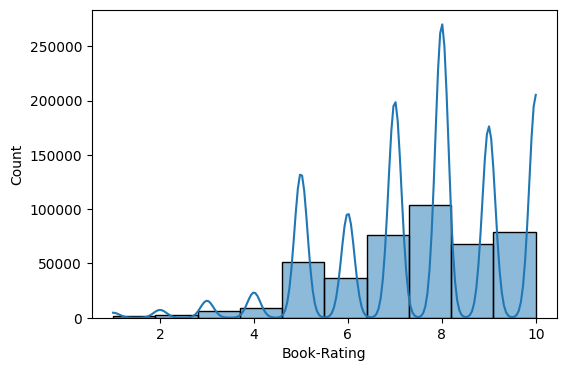

In [15]:
#let us see the ratings distribution
plt.figure(figsize=(6,4))
sns.histplot(df_clean["Book-Rating"], bins = 10, kde = True)
plt.show()

Most number of user ratings are present above 5

In [16]:
#let us see from which country more number of readers are there
#we have to extract the country from the location column in users
user_copy = users.copy()

In [17]:
user_copy["Country"] = user_copy["Location"].str.split(",").str[-1]
user_copy.head()

,User-ID,Location,Age,Country
0,1,"nyc, new york, usa",NaN,usa
1,2,"stockton, california, usa",18.0,usa
2,3,"moscow, yukon territory, russia",NaN,russia
3,4,"porto, v.n.gaia, portugal",17.0,portugal
4,5,"farnborough, hants, united kingdom",NaN,united kingdom


In [18]:
#top 5 countries
con_count = user_copy["Country"].value_counts().reset_index().head()
#con_count.reset_index(inplace = True)
con_count

,Country,count
0,usa,139711
1,canada,21658
2,united kingdom,18538
3,germany,17043
4,spain,13147


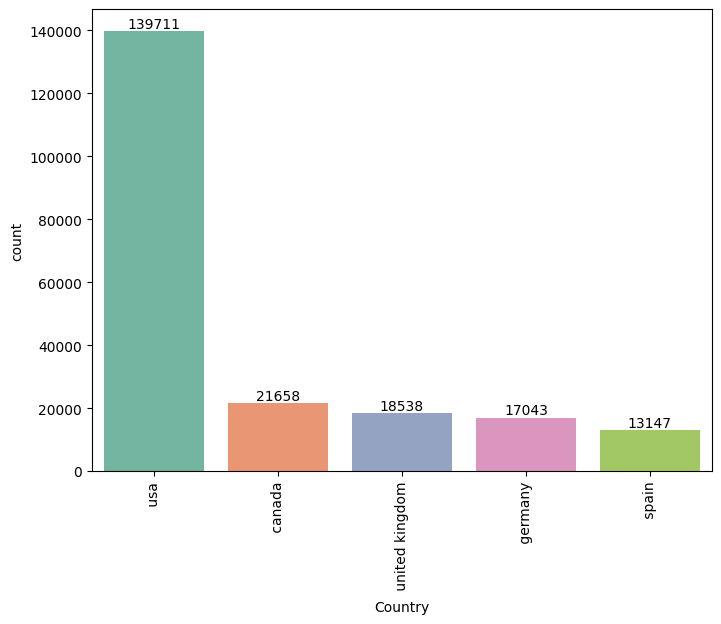

In [19]:
plt.figure(figsize = (8,6))
ax = sns.barplot(data = con_count, x = "Country", y = "count", palette = "Set2")
plt.xticks(rotation = 90)
for i in ax.containers:
  ax.bar_label(i)
plt.show()

### Null value detection

In [21]:
#null values in the ratings data
ratings.isnull().sum()/len(ratings)*100

,0
User-ID,0.0
ISBN,0.0
Book-Rating,0.0


There are no null values present in the dataset

In [22]:
#users
users.isnull().sum()/len(users)*100

,0
User-ID,0.000000
Location,0.000000
Age,39.719857


Age column has a lot of null values. Around 39% is null
- Since we are not bothered about the age of users we can let it be like that only.

In [23]:
#books
books.isnull().sum()/len(books)*100

,0
ISBN,0.000000
Book-Title,0.000000
Book-Author,0.000737
Year-Of-Publication,0.000000
Publisher,0.000737
Image-URL-S,0.000000
Image-URL-M,0.000000
Image-URL-L,0.001106


There are few null values present.

### Duplicate detection

In [24]:
books.duplicated().sum()

np.int64(0)

In [25]:
users.duplicated().sum()

np.int64(0)

In [26]:
ratings.duplicated().sum()

np.int64(0)

There are no duplicate entries in any of the dataset

We will use a Frequency based/ Popularity based recommendation approach and a Collaborative Filtering Method.

### **Popularity Based Recommendation**
We can consider two main things which can tell us about the popularity of a book.
- Ratings given to that book
- Number of ratings given to the book

But can we say that the book is popular just because it got high ratings? (NO)

-> We also have to consider how many ratings the book got (Total number of ratings of the book). Only on that basis we can say that either the book is popular or not.

So we have to check if the number of ratings the book got exceeds a fixed number of count(a threshold value, say 50).

Let us see the ratings data

In [27]:
df_clean.head()

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6


Can we actually say that the ISBN number can be considered as a unqiue identifier of a book? (NO)
- It will not the case everytime. Multiple books can also have same ISBN number.
- It is better to take the Title of the book as the identifier
- We have to merge the ratings data with the books data for that


In [28]:
#merging the datasets using ISBN number
ratings_with_title = df_clean.merge(books, on = "ISBN")
ratings_with_title.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
4,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...


In [29]:
ratings_with_title.shape

(383842, 10)

In [30]:
#let us groupby using Book Title and find the count
num_rating = ratings_with_title.groupby("Book-Title").count()["Book-Rating"]
num_rating.head()

,Book-Rating
Book-Title,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",1
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1
Dark Justice,1
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",7
Final Fantasy Anthology: Official Strategy Guide (Brady Games),2


In [31]:
num_rating = num_rating.reset_index()
num_rating.columns = ["Book-Title", "Num-Ratings"]
num_rating.head()

,Book-Title,Num-Ratings
0,A Light in the Storm: The Civil War Diary of ...,1
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1
2,Dark Justice,1
3,Earth Prayers From around the World: 365 Pray...,7
4,Final Fantasy Anthology: Official Strategy Gu...,2


In [32]:
#let us see the value counts of number of rating
num_rating["Num-Ratings"].value_counts()

,count
Num-Ratings,
1,88140
2,20652
3,8459
4,4576
5,2896
...,...
267,1
250,1
295,1


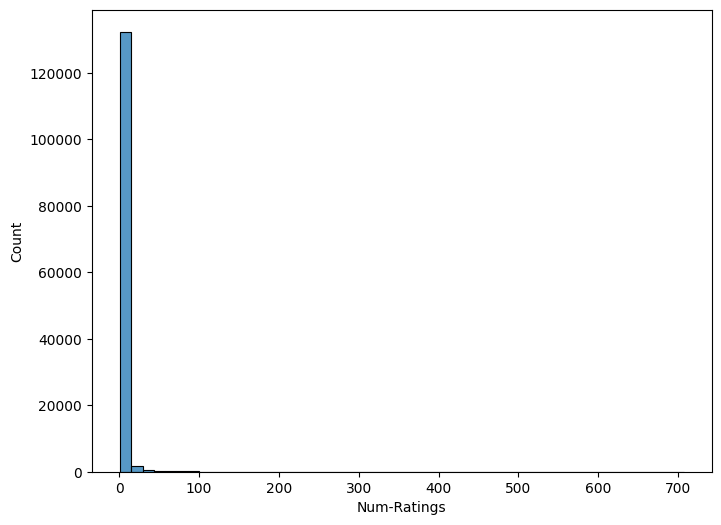

In [33]:
#let us see the distribution of the number of ratings
plt.figure(figsize = (8,6))
sns.histplot(num_rating["Num-Ratings"], bins = 50)
plt.show()

It is observable that the distribution is highly skewed around 1 and 2. ie, more number of books was rated only 1 or two times


In [34]:
# to find the average number of ratings given to a book
avg_rating = ratings_with_title.groupby("Book-Title").mean(numeric_only = True)["Book-Rating"].reset_index()
avg_rating.head()

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
2,Dark Justice,10.000000
3,Earth Prayers From around the World: 365 Pray...,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,10.000000


In [35]:
avg_rating.columns = ["Book-Title", "Avg-Ratings"]
avg_rating.head()

,Book-Title,Avg-Ratings
0,A Light in the Storm: The Civil War Diary of ...,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
2,Dark Justice,10.000000
3,Earth Prayers From around the World: 365 Pray...,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,10.000000


Now we have calculated the average rating and the number of ratings. We have to merge these two data and to see which are the popular books

In [36]:
popular_df = num_rating.merge(avg_rating, on = "Book-Title")
popular_df.head()

,Book-Title,Num-Ratings,Avg-Ratings
0,A Light in the Storm: The Civil War Diary of ...,1,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
2,Dark Justice,1,10.000000
3,Earth Prayers From around the World: 365 Pray...,7,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,2,10.000000


In [37]:
#let us see the movies with number of ratings >= 50
popular_df[popular_df["Num-Ratings"] >= 50].sort_values("Avg-Ratings", ascending = False).head(10)

,Book-Title,Num-Ratings,Avg-Ratings
119061,"The Two Towers (The Lord of the Rings, Part 2)",136,9.330882
115128,"The Return of the King (The Lord of the Rings,...",103,9.213592
45381,Harry Potter and the Goblet of Fire (Book 4),247,9.125506
107392,The Hobbit,50,9.120000
109837,The Little Prince,90,9.111111
18993,Charlotte's Web (Trophy Newbery),68,9.073529
45400,Harry Potter and the Sorcerer's Stone (Book 1),176,9.062500
925,84 Charing Cross Road,61,9.049180
45385,Harry Potter and the Order of the Phoenix (Boo...,211,9.047393
45393,Harry Potter and the Prisoner of Azkaban (Book 3),277,9.043321


Now we can create a Collaborative Filtering System

### **Collaborative Filtering System** :

Collaborative Filtering is a popular recommender system technique that suggests items (movies, books, products, etc.) to a user based on what other similar users liked or rated.

In [38]:
#we will first see the regualar users from the rating with title data who have did more than 50 ratings
x = ratings_with_title.groupby("User-ID").count() > 50
x.head()

,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
User-ID,,,,,,,,,
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False
14,False,False,False,False,False,False,False,False,False
16,False,False,False,False,False,False,False,False,False


In [39]:
regular_users = x[x].index  #gets only the indexes of them
regular_users

Index([     8,      9,     12,     14,     16,     17,     19,     22,     26,
           32,
       ...
       278831, 278832, 278836, 278843, 278844, 278846, 278849, 278851, 278852,
       278854],
      dtype='int64', name='User-ID', length=68091)

Now we can filter those users who are the regular users from all the users

In [40]:
filtered_ratings = ratings_with_title[ratings_with_title["User-ID"].isin(regular_users)]
filtered_ratings.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
4,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...


This gives us the data of the users who has atleast 50 number of ratings

In [41]:
#filtering those books which has atleast 30 number of ratings
y = filtered_ratings.groupby("Book-Title")["Book-Title"].count()>= 30
famous_books = y[y].index

In [42]:
famous_books

Index(['1984', '1st to Die: A Novel', '2010: Odyssey Two', '24 Hours',
       '2nd Chance', '3rd Degree', '4 Blondes', '84 Charing Cross Road',
       'A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash',
       'A Bend in the Road',
       ...
       'Wizard's First Rule (Sword of Truth, Book 1)',
       'Women Who Run with the Wolves',
       'Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players',
       'Writ of Execution', 'Wuthering Heights',
       'Wuthering Heights (Penguin Classics)', 'Year of Wonders',
       'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=1324)

In [43]:
#getting the final ratings which are only the details of the famous books
final_ratings = filtered_ratings[filtered_ratings["Book-Title"].isin(famous_books)]
final_ratings.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
4,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...
5,276747,0671537458,9,Waiting to Exhale,Terry McMillan,1995,Pocket,http://images.amazon.com/images/P/0671537458.0...,http://images.amazon.com/images/P/0671537458.0...,http://images.amazon.com/images/P/0671537458.0...
11,276754,0684867621,8,The Girl Who Loved Tom Gordon : A Novel,Stephen King,1999,Scribner,http://images.amazon.com/images/P/0684867621.0...,http://images.amazon.com/images/P/0684867621.0...,http://images.amazon.com/images/P/0684867621.0...
12,276755,0451166892,5,The Pillars of the Earth,Ken Follett,1996,Signet Book,http://images.amazon.com/images/P/0451166892.0...,http://images.amazon.com/images/P/0451166892.0...,http://images.amazon.com/images/P/0451166892.0...


We are going to convert this table into a pivot table with indexes as "Book-Title", columns as "User-ID" and the values would be the "Book-Rating". Specifically in this case we are going to find an Item-Item similarity

In [44]:
piv_tab = final_ratings.pivot_table(index = "Book-Title", columns = "User-ID", values = "Book-Rating")
piv_tab.head()

User-ID,9,16,26,32,39,42,51,75,91,97,...,278820,278824,278828,278832,278836,278843,278844,278846,278851,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010: Odyssey Two,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24 Hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This looks like a sparse table

We are going to impute 0 if there is a NaN value

In [45]:

#imputing null values
piv_tab.fillna(0, inplace= True)
piv_tab.head()

User-ID,9,16,26,32,39,42,51,75,91,97,...,278820,278824,278828,278832,278836,278843,278844,278846,278851,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now we have to check which all books are similar to each other. For that we can use cosine similarity

In [46]:
#cosine similarity
similarity_scores = cosine_similarity(piv_tab)
similarity_scores

array([[1.        , 0.02293467, 0.04606926, ..., 0.01101283, 0.03868566,
        0.01593066],
       [0.02293467, 1.        , 0.00768201, ..., 0.05450375, 0.01372143,
        0.05600096],
       [0.04606926, 0.00768201, 1.        , ..., 0.        , 0.03163616,
        0.        ],
       ...,
       [0.01101283, 0.05450375, 0.        , ..., 1.        , 0.01122291,
        0.05475341],
       [0.03868566, 0.01372143, 0.03163616, ..., 0.01122291, 1.        ,
        0.00848073],
       [0.01593066, 0.05600096, 0.        , ..., 0.05475341, 0.00848073,
        1.        ]])

In [47]:
similarity_scores.shape

(1324, 1324)

In [48]:
#index of a book
np.where(piv_tab.index == "2nd Chance")

(array([4]),)

In [49]:
#first 10 similar books (excluded first element because the cosine similarity will be 1 with itself)
sorted(list(enumerate(similarity_scores[4])), key = lambda x : x[1], reverse = True)[1:11]

[(1, np.float64(0.1634449088540418)),
 (1264, np.float64(0.1592314435754203)),
 (735, np.float64(0.15169566103216114)),
 (352, np.float64(0.1496976054940842)),
 (5, np.float64(0.14462853685574262)),
 (1180, np.float64(0.14338397574955836)),
 (885, np.float64(0.13672800264037135)),
 (1291, np.float64(0.1219564741019781)),
 (1102, np.float64(0.12121980956541412)),
 (587, np.float64(0.11699783442917651))]

Now we have to create a function to recommend a similar book the user chooses

In [50]:
#recommedation function

def recommend(book_name) :
  #index of the book_name from the pivot tabel
  index = np.where(piv_tab.index == book_name)[0][0]

  #getting the top 10 movies which are having high cosine similarity with the book
  similar_books = sorted(list(enumerate(similarity_scores[index])), key = lambda x : x[1], reverse= True)[1:11]

  #fetching the details of the books
  data = []
  for i in similar_books :
    item = []
    #fetching details of the similar books
    temp_df = books[books["Book-Title"] == piv_tab.index[i[0]]]

    #Adding title, author and image url
    item.extend(list(temp_df.drop_duplicates("Book-Title")["Book-Title"].values))
    item.extend(list(temp_df.drop_duplicates("Book-Title")["Book-Author"].values))
    item.extend(list(temp_df.drop_duplicates("Book-Title")["Image-URL-L"].values))

    data.append(item)

  return data

In [51]:
recommend("1984")

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.LZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.LZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.LZZZZZZZ.jpg'],
 ["Slaughterhouse Five or the Children's Crusade: A Duty Dance With Death",
  'Kurt Vonnegut',
  'http://images.amazon.com/images/P/0440180295.01.LZZZZZZZ.jpg'],
 ['American Psycho (Vintage Contemporaries)',
  'Bret Easton Ellis',
  'http://images.amazon.com/images/P/0679735771.01.LZZZZZZZ.jpg'],
 ['The Catcher in the Rye',
  'J.D. Salinger',
  'http://images.amazon.com/images/P/0316769487.01.LZZZZZZZ.jpg'],
 ['Lord of the Flies',
  'William Gerald Golding',
  'http://images.amazon.com/images/P/0399501487.01.LZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.LZZZZZZZ.jpg'],
 ['The Auto

These are the top 10 recommended movies using cosine similarity

In [52]:
recommend("Harry Potter and the Prisoner of Azkaban (Book 3)")

[['Harry Potter and the Goblet of Fire (Book 4)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439139597.01.LZZZZZZZ.jpg'],
 ['Harry Potter and the Chamber of Secrets (Book 2)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439064872.01.LZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Book 1)",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0590353403.01.LZZZZZZZ.jpg'],
 ['Harry Potter and the Order of the Phoenix (Book 5)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/043935806X.01.LZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/059035342X.01.LZZZZZZZ.jpg'],
 ['The Fellowship of the Ring (The Lord of the Rings, Part 1)',
  'J.R.R. TOLKIEN',
  'http://images.amazon.com/images/P/0345339703.01.LZZZZZZZ.jpg'],
 ['The Two Towers (The Lord of the Rings, Part 2)',
  'J.R.R. TOLKIEN',
  'http://images.amazon.com/images/P/0345339711.01.LZZZZZZZ.jpg']

## **Conclusions**
1. The recommendation system successfully identifies books similar to a user's interest using collaborative filtering, improving the overall user experience in book discovery.
2. A combination of popularity-based filtering (for cold-start users) and collaborative filtering (for active users) offers both generalized and personalized suggestions.
3. Cosine similarity proved to be an effective metric for computing item-item similarity, enabling the system to recommend contextually similar books.
4. By filtering regular users and popular books, the model reduces sparsity and improves computational efficiency, making it more scalable.

### Thank You!